In [2]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 
import IS as isfn

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

# Baseline - PTZ avalanches

In [3]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p5list = sorted(glob.glob('*PTZ05*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
p5list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01_av.npy']

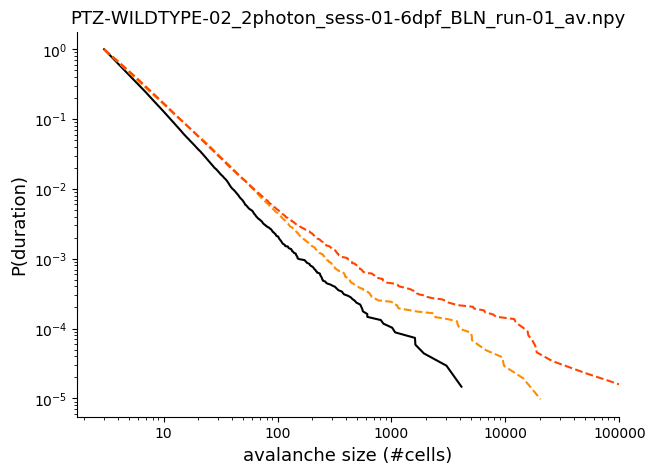

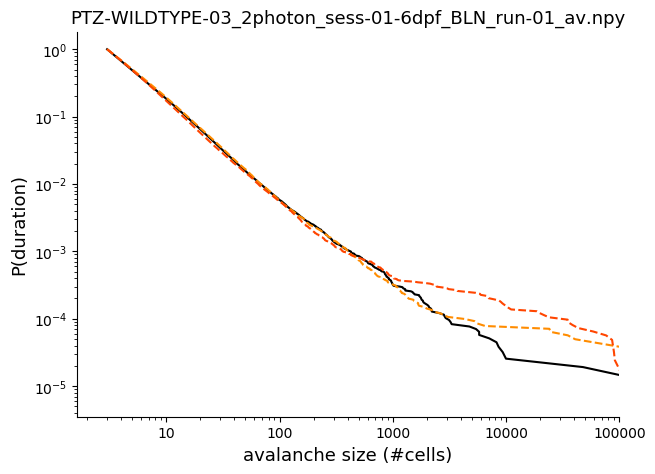

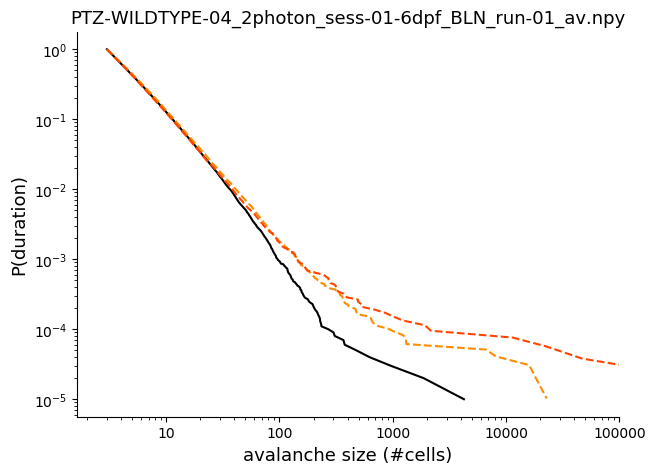

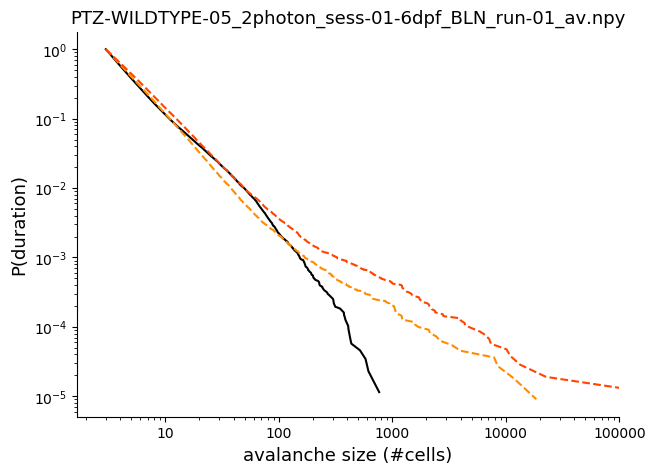

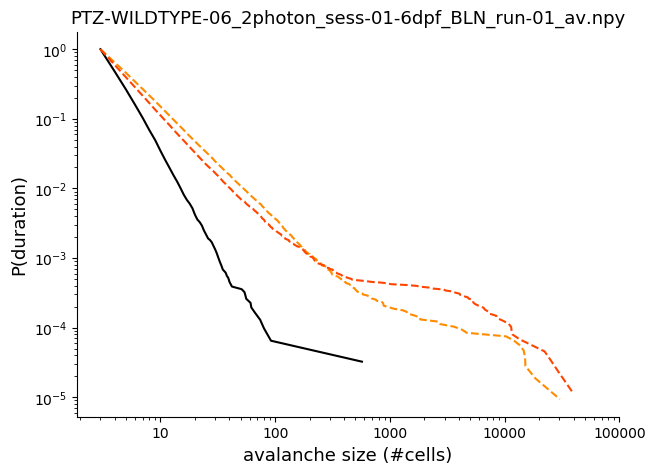

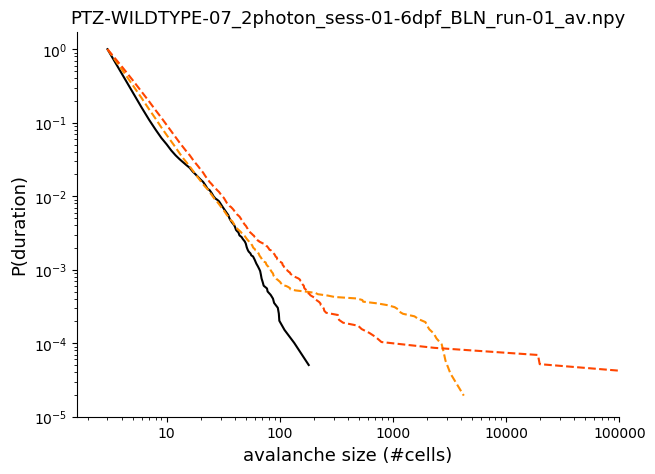

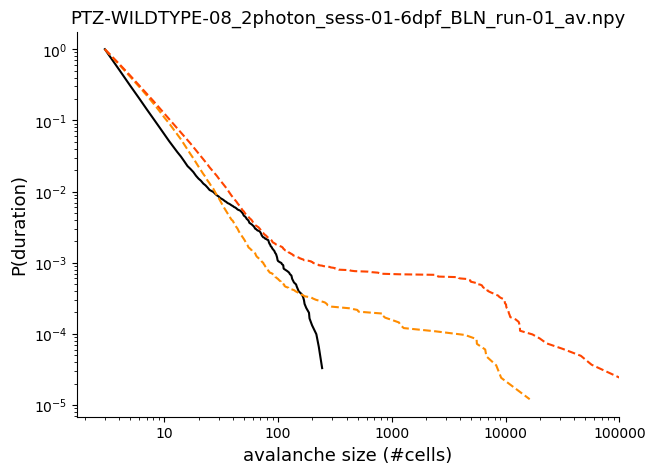

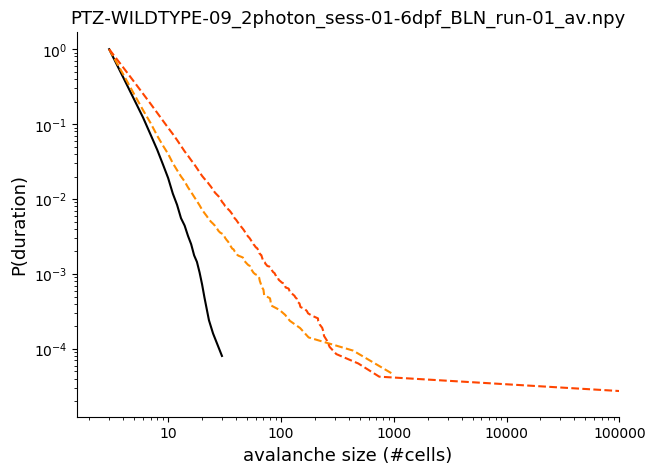

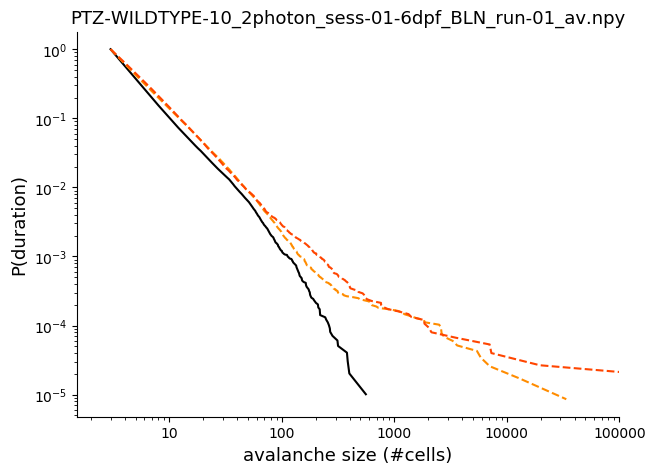

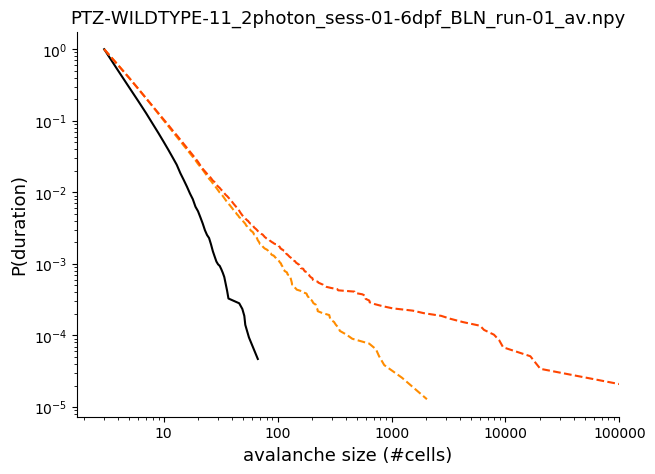

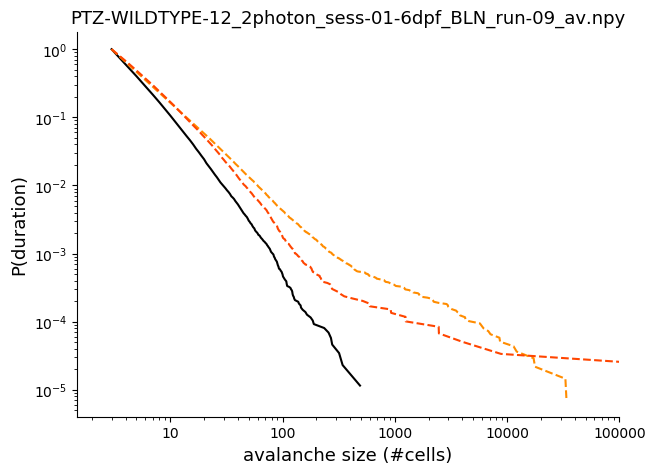

In [4]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
choose=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        avdistcut = np.load(plotlist[e][0])[choose]
        powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =1.5 , markersize = 1, alpha = 1, c = colors[e])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 100000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

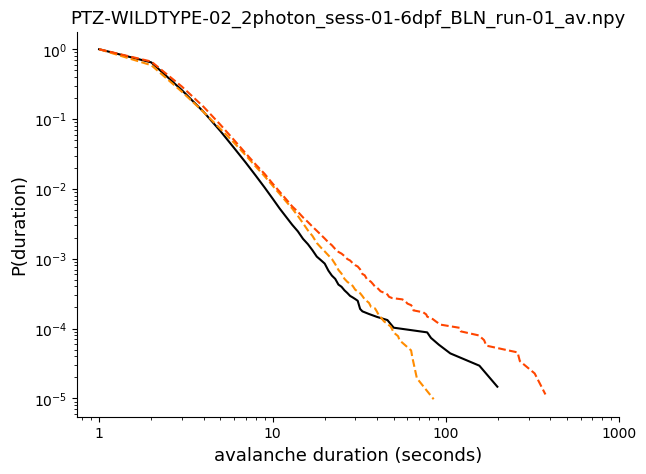

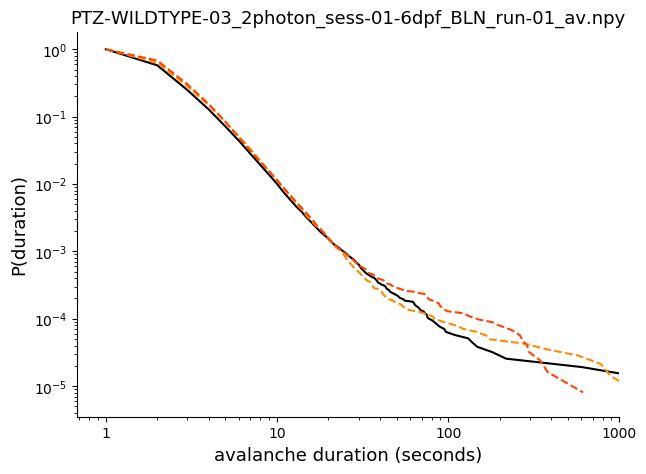

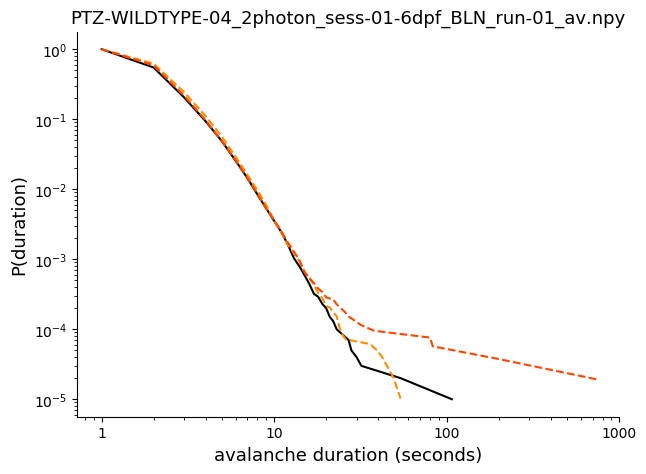

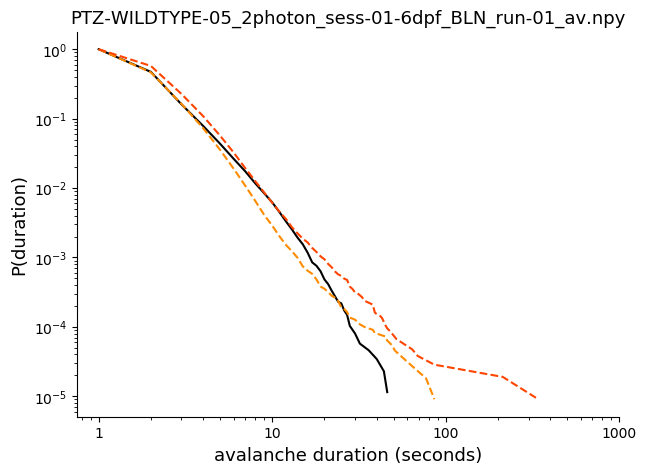

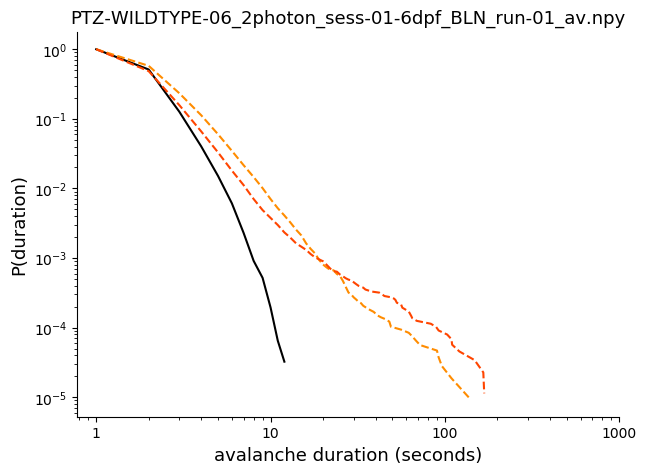

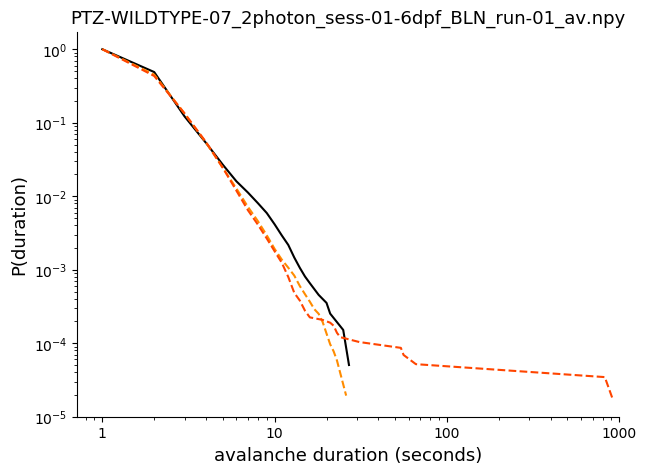

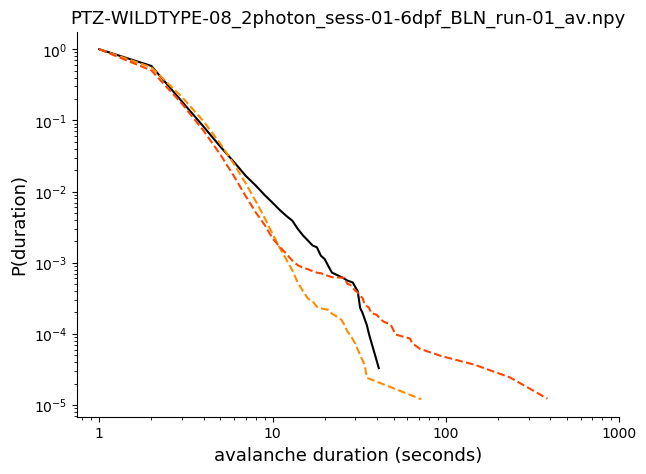

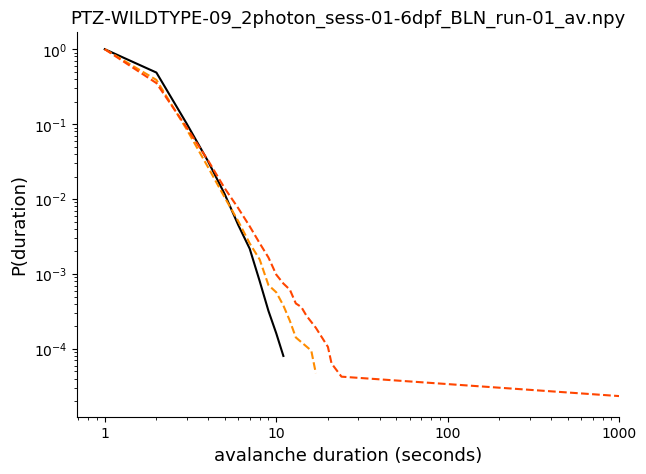

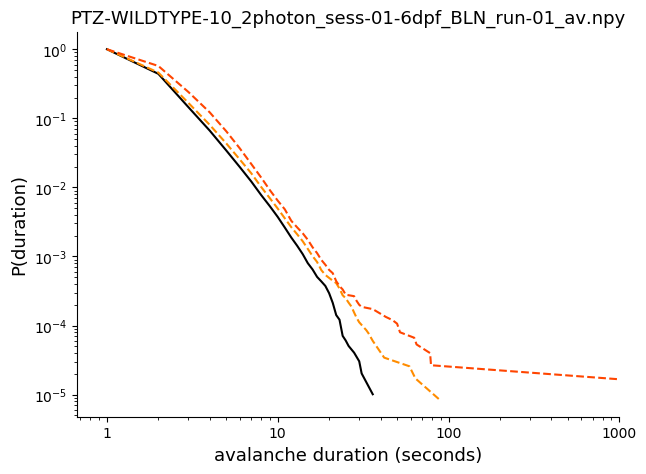

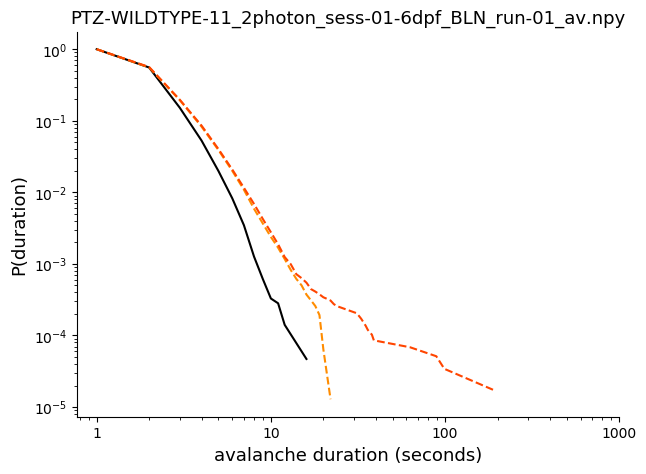

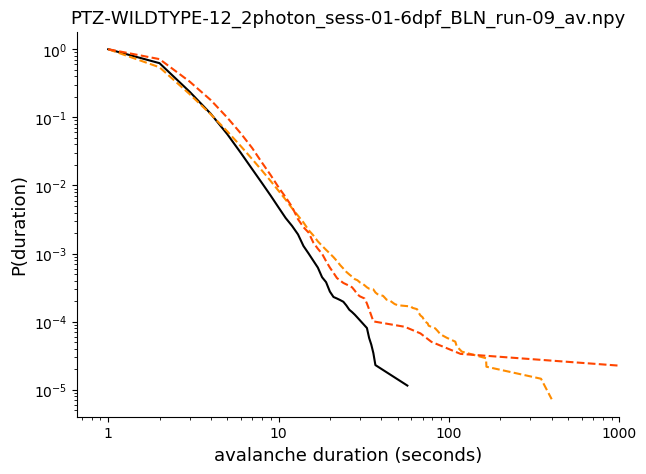

In [6]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
choose=1
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        avdistcut = np.load(plotlist[e][0])[choose]
        powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =1.5 , markersize = 1, alpha = 1, c = colors[e])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 1000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

### Exponent

In [ ]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
sblnlist = sorted(glob.glob('*BLN*size*marglik_power.npy*'))
sp5list = sorted(glob.glob('*PTZ05*size*marglik_power.npy*'))
sp20list = sorted(glob.glob('*PTZ20*size*marglik_power.npy*'))
dblnlist = sorted(glob.glob('*BLN*dur*marglik_power.npy*'))
dp5list = sorted(glob.glob('*PTZ05*dur*marglik_power.npy*'))
dp20list = sorted(glob.glob('*PTZ20*dur*marglik_power.npy*'))
blnavlist = sorted(glob.glob('*BLN*_av.npy*'))
p5avlist = sorted(glob.glob('*PTZ05*_av.npy*'))
p20avlist = sorted(glob.glob('*PTZ20*_av.npy*'))
p5avlist

In [14]:
#SIZE - KS
exp = np.zeros((33))
avlist = [sblnlist, sp5list,sp20list]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

sizexdf = {}
count=0
for i in range(len(avlist)):
    for y in range(11):
        exp[count] = np.load(avlist[i][y] ,allow_pickle=True)[0]
        count+=1
sizexdf = pd.DataFrame({"Exponent":exp , "Labels":  np.append(adfn.repeat_list('Baseline',11),np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11))), "Fish":flist})

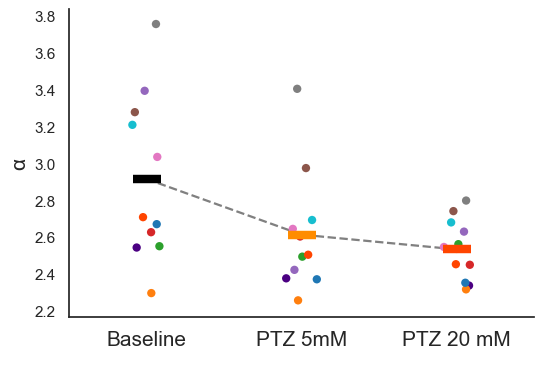

In [15]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = sizexdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data=sizexdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20 mM'], size = 15)
ax.legend_.remove()
plt.show()

In [16]:
adfn.ttest(sizexdf, 'Labels', 'Exponent', ['Baseline', 'PTZ 5mM', 'PTZ 20mM'], mode='single')

[[3.68500472273514,
  0.0042114298225682315,
  0.025,
  'Significant',
  'Baseline - PTZ 5mM'],
 [4.123062276890488,
  0.0020669577179286266,
  0.025,
  'Significant',
  'Baseline - PTZ 20mM']]

In [17]:
#DUR - KS
exp = np.zeros((33))
avlist = [dblnlist, dp5list,dp20list]
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

durexdf = {}
count=0
for i in range(len(avlist)):
    for y in range(11):
        exp[count] = np.load(avlist[i][y] ,allow_pickle=True)[0]
        count+=1
durexdf = pd.DataFrame({"Exponent":exp , "Labels":  np.append(adfn.repeat_list('Baseline',11),np.append(adfn.repeat_list('PTZ 5mM',11),adfn.repeat_list('PTZ 20mM',11))), "Fish":flist})

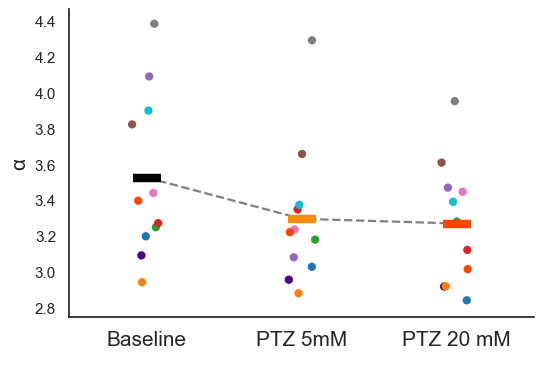

In [18]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data = durexdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Exponent", data=durexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data=durexdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20 mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

In [19]:
adfn.ttest(durexdf, 'Labels', 'Exponent', ['Baseline', 'PTZ 5mM', 'PTZ 20mM'], mode='single')

[[2.570670744282152,
  0.027858595637647636,
  0.025,
  'Not significant',
  'Baseline - PTZ 5mM'],
 [3.881153590584479,
  0.003053193950017093,
  0.025,
  'Significant',
  'Baseline - PTZ 20mM']]

# Branching ratio

In [ ]:
# Create lists of bin
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
b_branchlist = sorted(glob.glob('*rand*branch*'))
pre_branchlist = sorted(glob.glob('*pre*branch*'))
p20_branchlist = sorted(glob.glob('*_ictal*branch*'))
branchlist = [b_branchlist, pre_branchlist, p20_branchlist]

branchlist

In [ ]:
### Recalculate avalanches + branching ratio
bin_list = [bln_blist, pre_blist, p20_blist]
nnb_list = [sub_bln_nnblist, gen_nnblist, gen_nnblist]
savename = ['_randbase-', '_preictal-', '_ictal-']

for e in range(len(bin_list)):
    for i in range(len(bin_list[e])):
        av, pkg = crfn.avalanche(nnb_list[e][i], bin_list[e][i], Fdrop, experiment)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnb_list[e][i]], 'short') + savename[e] + 'av.npy', av)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnb_list[e][i]], 'short') + savename[e] + 'pkg.npy', pkg)
        branch = crfn.branch(pkg, av, Fdrop, experiment)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnb_list[e][i]], 'short') + savename[e] + 'branch.npy', branch)


In [ ]:
#BRANCH RATIO
import pandas as pd

branch = np.zeros((27))
count=0
for i in range(len(branchlist)):
    for e in range(len(branchlist[i])):
        branch[count] = np.load(branchlist[i][e])
        count+=1

fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

bdf = pd.DataFrame({"Branching ratio":branch , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

In [ ]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Branching ratio", data = bdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.set_xticklabels(['Baseline', 'Pre-ictal', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

In [ ]:
adfn.ttest(bdf, 'Labels', 'Branching ratio', ['Baseline', 'Pre-ictal', 'Ictal'], mode='multiple')[0]

# Null models
* Null 1 - shuffle all - does a completely stochastic system generate avalanches?
* Null 2 - neighbour swap - is the spatial structure of cells important for generating critical avalanche dynamics?
* Null 3 - phase slide - is the temporal structure of cell firing important for generating critical avalanche dynamics?
* Null 4 - autocorrelation remove - is the signal memory of each active unit required for activity to spread? 

In [36]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
ptzlist = sorted(glob.glob('*PTZ20*_av.npy*'))
swaplist = sorted(glob.glob('*PTZ20*swap*'))
shufflelist = sorted(glob.glob('*PTZ20*shuff*'))
slidelist = sorted(glob.glob('*PTZ20*slide*'))
autolist = sorted(glob.glob('*PTZ20*auto*'))

## Baseline nulls


In [38]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
swaplist = sorted(glob.glob('*BLN*swap*'))
shufflelist = sorted(glob.glob('*BLN*shuff*'))
slidelist = sorted(glob.glob('*BLN*slide*'))
autolist = sorted(glob.glob('*BLN*auto*'))

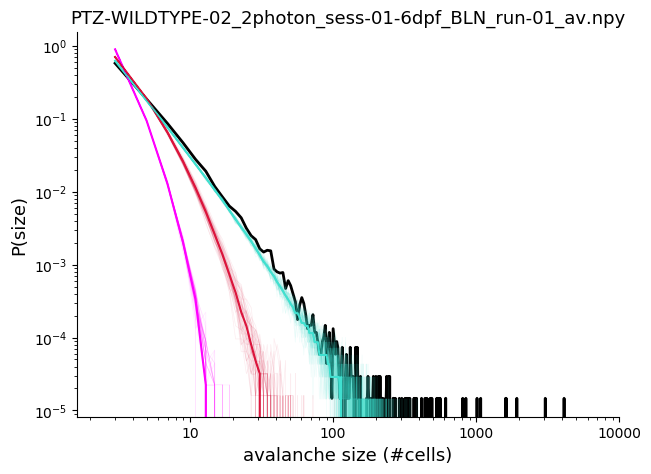

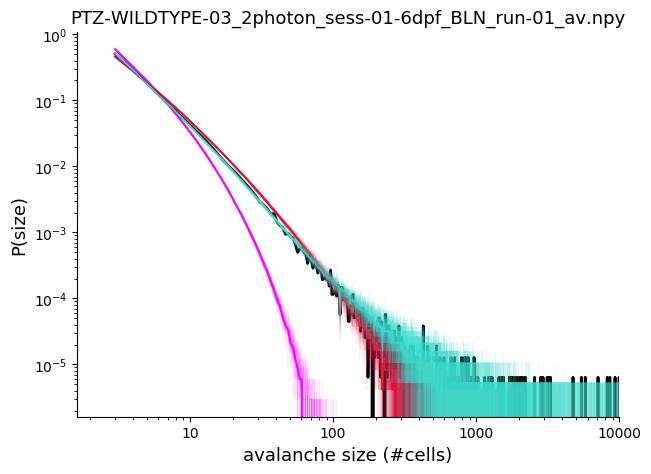

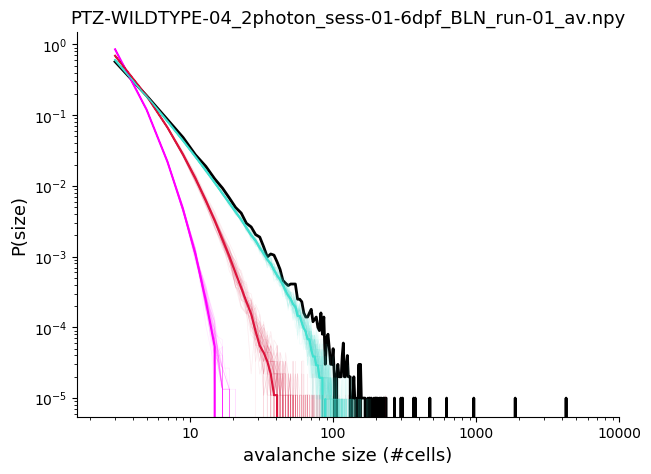

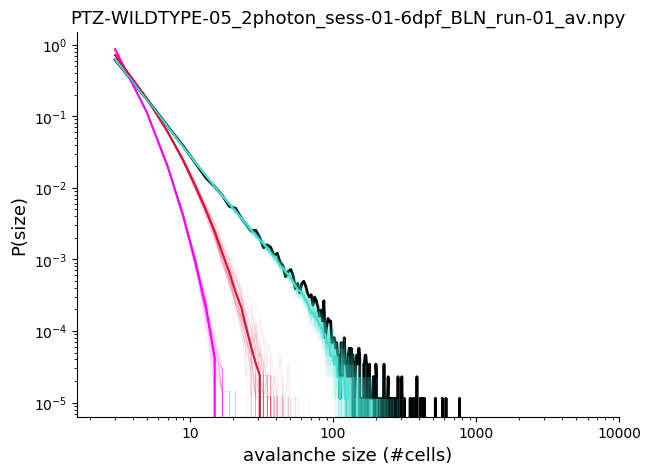

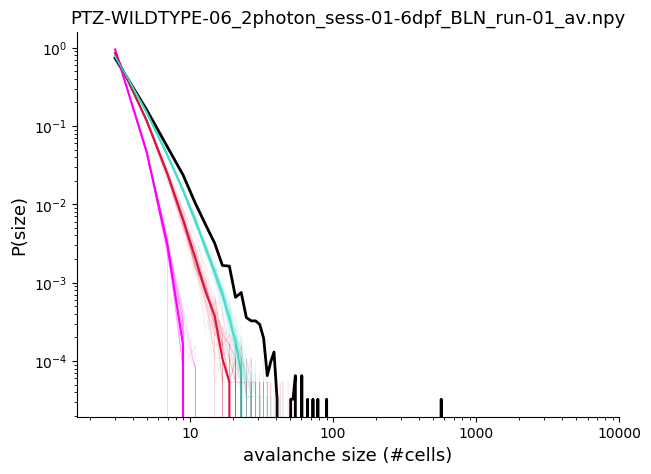

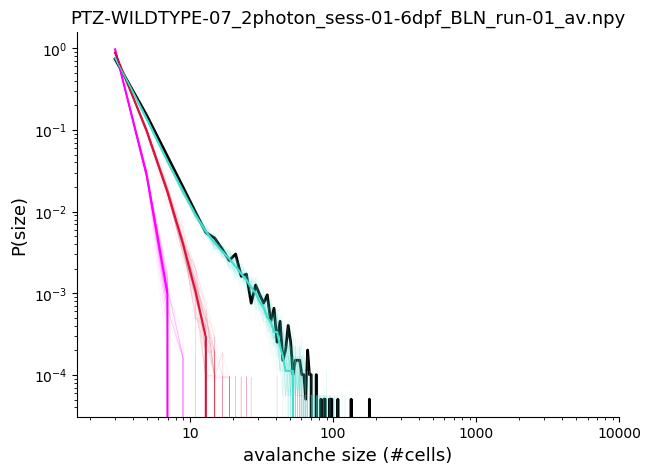

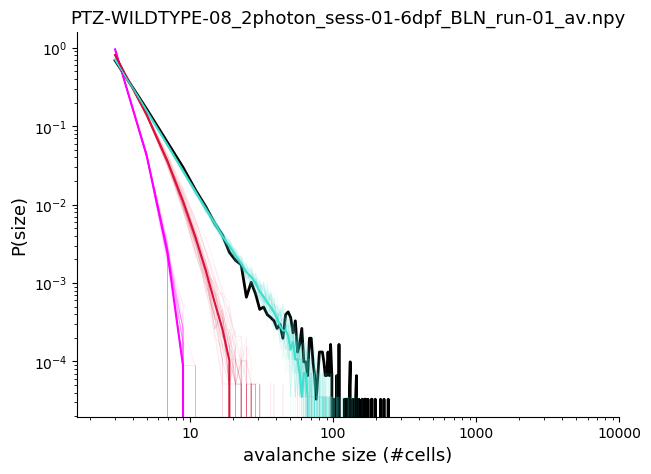

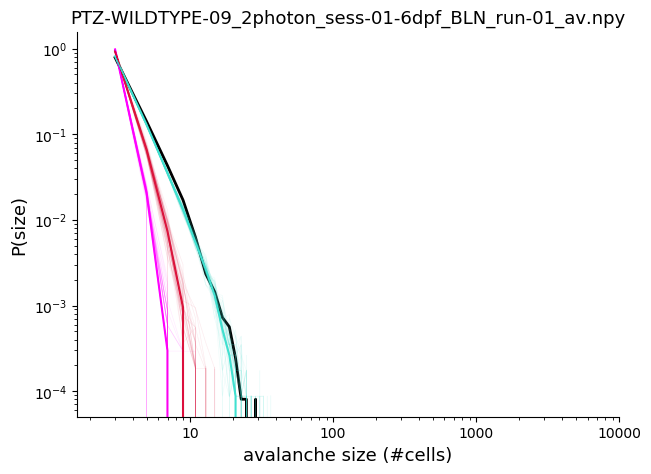

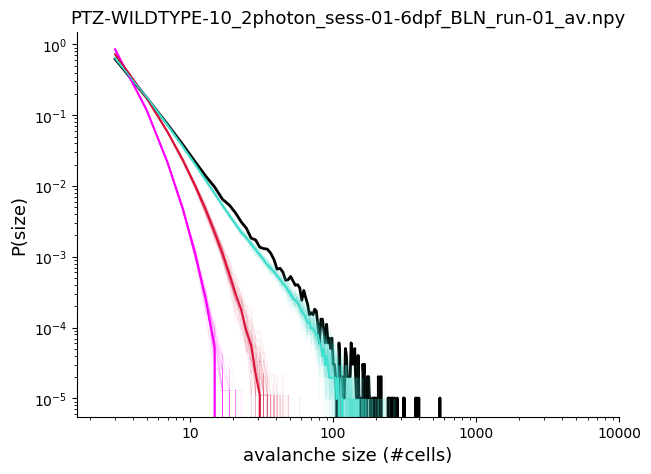

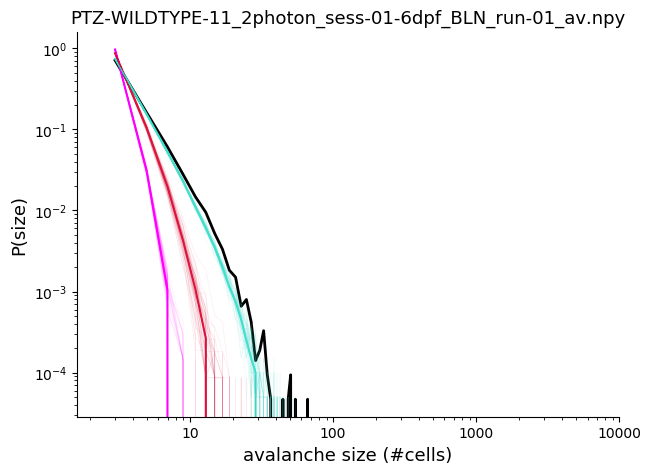

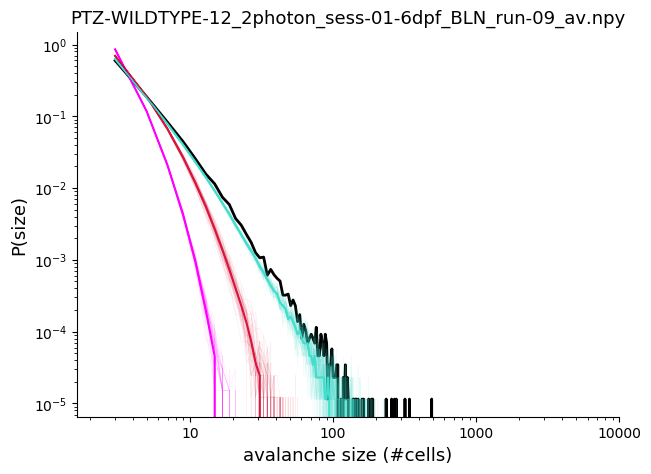

In [39]:
sns.reset_orig()
import matplotlib
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'magenta','crimson','turquoise']
nbins = 340000
choose=0
binvec = np.load(Fdrop + 'Project/' + experiment + os.sep + 'size_bln_null_combvec.npy')
maxi, mini = np.max(binvec), np.min(binvec)
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    swaplist = sorted(glob.glob('*E-' + i + '*BLN*swap*'))
    shufflelist = sorted(glob.glob('*E-' + i + '*BLN*shuff*'))
    slidelist = sorted(glob.glob('*E-' + i + '*BLN*slide*'))
    autolist = sorted(glob.glob('*E-' + i + '*BLN*auto*'))
    fig, axarr = plt.subplots(figsize = (7,5))
    
    shuffvec, swapvec, slidevec, autovec =[],[],[],[]
    veclist = [shuffvec, swapvec, autovec]
    nulist = [shufflelist, swaplist, autolist]
    avdistcut = np.load(blnlist[0])[choose]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, c = colors[0])
    for e in range(len(nulist)):
        mean_null = adfn.mean_distribution(nulist[e], choose)
        binned = np.linspace(mini,maxi,nbins)
        hist = np.histogram(mean_null, bins = binned)
        xaxis = hist[1][:-1]
        yaxis = hist[0]/np.sum(hist[0])
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[e+1])
    for e in range(len(veclist)):
        for t in range(len(nulist[e])):
            binned = np.linspace(mini,maxi,nbins)
            hist = np.histogram(np.load(nulist[e][t])[0], bins = binned)
            xaxis = hist[1][:-1]
            yaxis = hist[0]/np.sum(hist[0])
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 0.5, markersize = 1, alpha = 0.08, c = colors[e+1])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 10000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

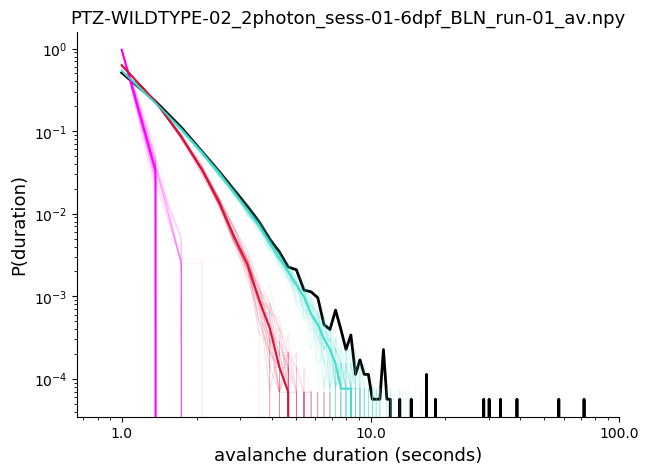

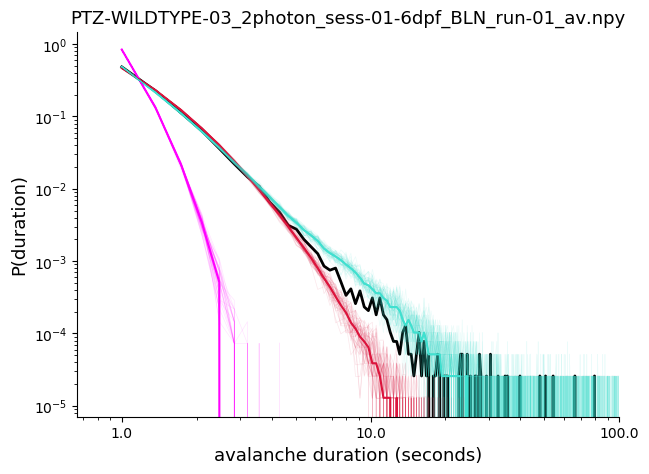

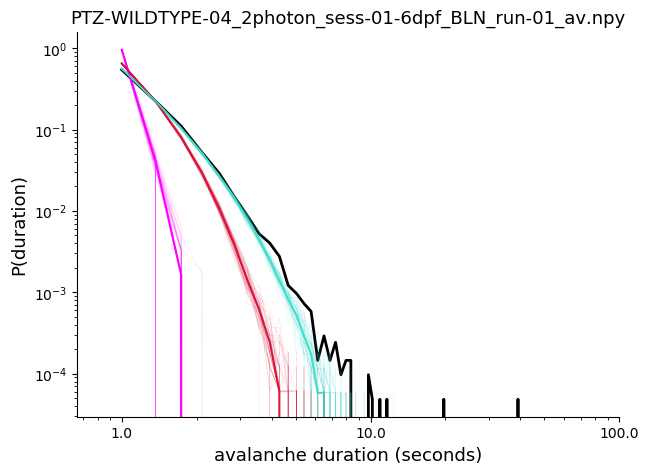

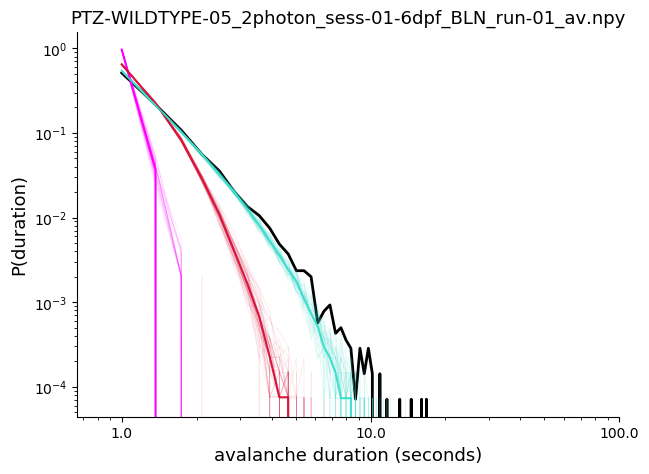

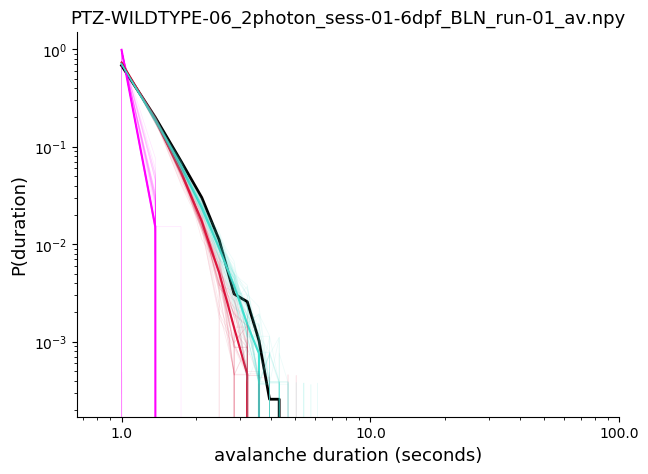

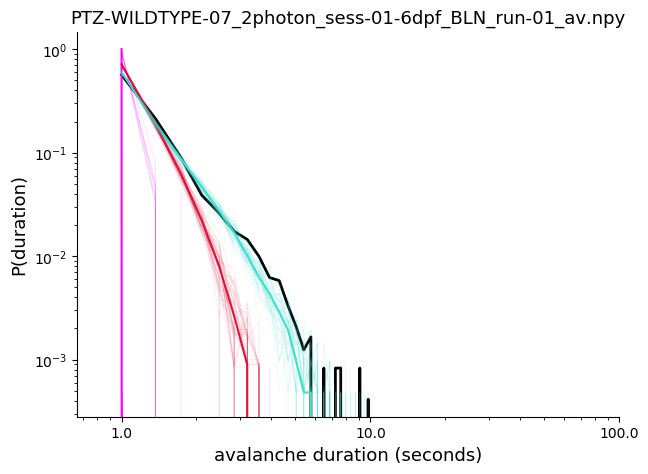

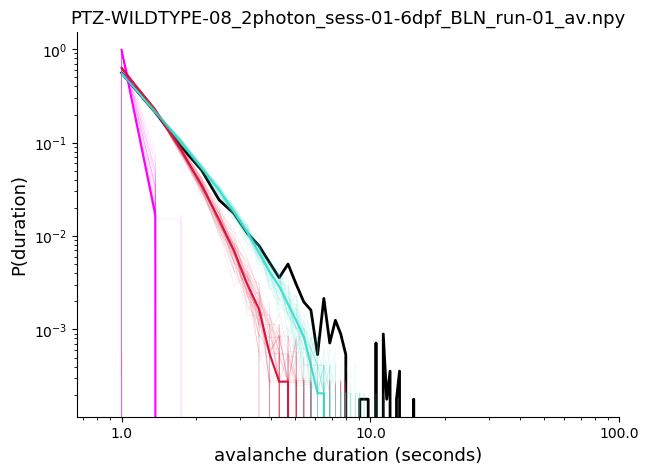

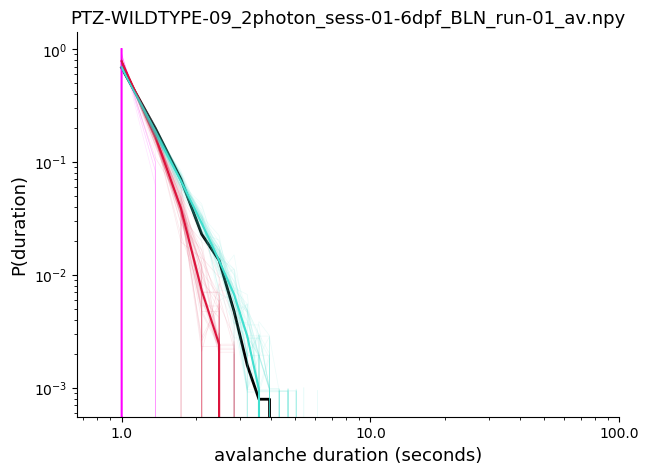

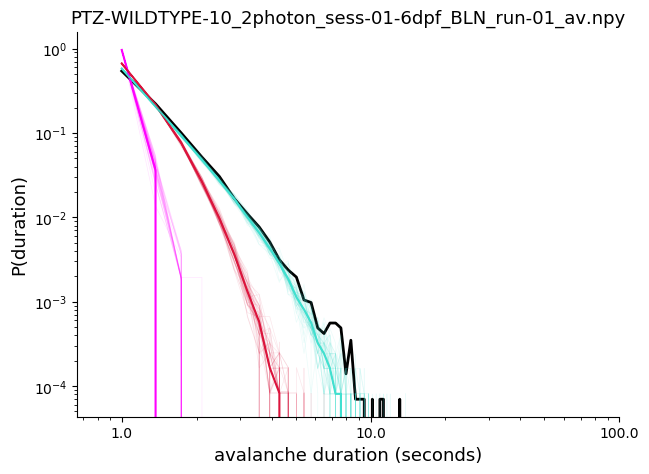

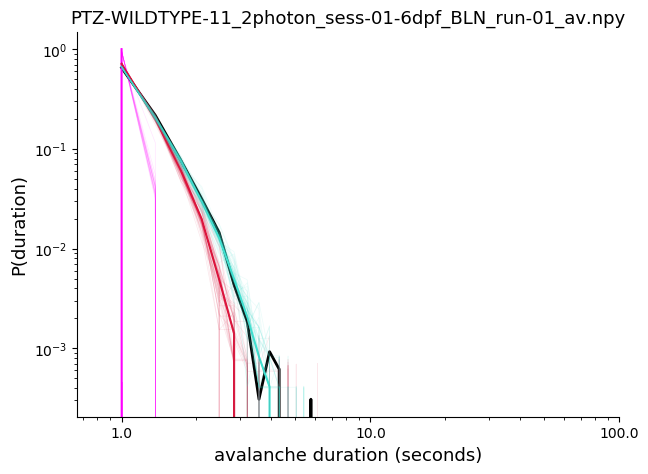

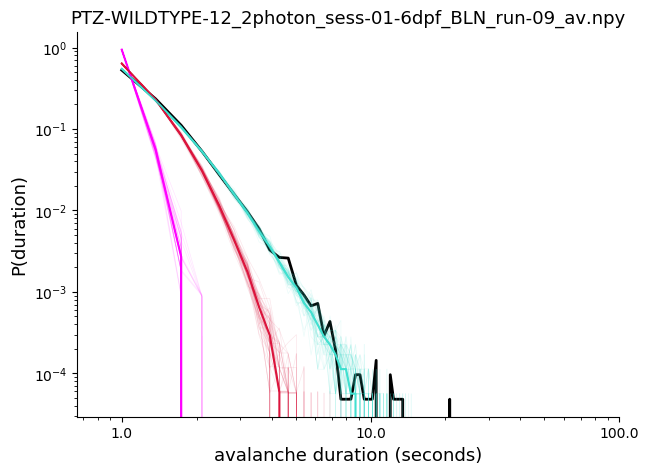

In [40]:
import matplotlib
sns.reset_orig()

num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'magenta','crimson','turquoise']
nbins = 11200
choose=1
dur_binvec = np.load(Fdrop + 'Project/' + experiment + os.sep + 'dur_bln_null_combvec.npy')
maxi, mini = np.max(dur_binvec), np.min(dur_binvec)
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    swaplist = sorted(glob.glob('*E-' + i + '*BLN*swap*'))
    shufflelist = sorted(glob.glob('*E-' + i + '*BLN*shuff*'))
    slidelist = sorted(glob.glob('*E-' + i + '*BLN*slide*'))
    autolist = sorted(glob.glob('*E-' + i + '*BLN*auto*'))
    fig, axarr = plt.subplots(figsize = (7,5))
    frameon=False
    shuffvec, swapvec, slidevec, autovec =[],[],[],[]
    veclist = [shuffvec, swapvec, autovec]
    nulist = [shufflelist, swaplist, autolist]
    avdistcut = (1/2.73)*np.load(blnlist[0])[choose]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, c = colors[0])
    for e in range(len(nulist)):
        mean_null = adfn.mean_distribution(nulist[e], choose)
        binned = np.linspace(mini,maxi,nbins)
        hist = np.histogram((1/2.73)*mean_null, bins = binned)
        xaxis = hist[1][:-1]
        yaxis = hist[0]/np.sum(hist[0])
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[e+1])
    for e in range(len(nulist)):
        for t in range(len(nulist[e])):
            binned = np.linspace(mini,maxi,nbins)
            hist = np.histogram((1/2.73)*np.load(nulist[e][t])[1], bins = binned)
            xaxis = hist[1][:-1]
            yaxis = hist[0]/np.sum(hist[0])
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 0.5, markersize = 1, alpha = 0.1, c = colors[e+1])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 100)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

### ks distance
* Which null distributions are more important to generate critical avalanche dynamics
* Size - spatial structure more important than temporal structure & autocorrelation - time structure still important
* Duration - spatial structure and temporal structure equally important 

* {for each fish - generate an average distribution, find ks distance of each point to that distribution}
* {for each baseline, quantify how far the baseline deviaties from that value - plot that ks distance (significant if > 1.96 sd from null mean)}


In [ ]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
size_powlist = sorted(glob.glob('*BLN*size*_power*'))
size_loglist = sorted(glob.glob('*BLN*size*_log*'))
dur_powlist = sorted(glob.glob('*BLN*dur*_power*'))
dur_loglist = sorted(glob.glob('*BLN*dur*_log*'))
size_powlist

In [ ]:
#SIZE - BASELINE MARGINAL LIKELIHOODS
""""count=0
choose = 0
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*BLN*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_size_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_size_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

In [ ]:
#DUR - BASELINE MARGINAL LIKELIHOODS
""""count=0
choose = 1
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*BLN*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_dur_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_dur_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

In [ ]:
#EXP - average exponent for each null
from scipy import stats
ks_list = adfn.list_of_list(22,4)
nullexp_list = adfn.list_of_list(22,4)
mode = [0,1]
count=0
num1 = adfn.name_zero('front', 2, 12, 1)
for y in range(2):
    for i in num1:
        os.chdir(Fdrop + 'Project/' + experiment)
        bln = np.load(sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))[0])
        swaplist = sorted(glob.glob('*E-' + i + '*BLN*swap*'))
        shufflelist = sorted(glob.glob('*E-' + i + '*BLN*shuff*'))
        autolist = sorted(glob.glob('*E-' + i + '*BLN*auto*'))
        slidelist = sorted(glob.glob('*E-' + i + '*BLN*slide*'))
        null_list = [shufflelist, swaplist,autolist]
        for f in range(len(null_list)):
            mean_null = adfn.mean_distribution(null_list[f], mode[y])
            ks_list[count][f] = crfn.ks_compare(null_list[f], mean_null, bln, mode[y], len(null_list[f]))
            if mode[y] == 0:
                data = mean_null
                sizes=data
                M=len(sizes)
                a=min(sizes) #define xmin
                b=max(sizes) #define xmax
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=isfn.IS_LN(npart, sizes, M, a, b)
                po=isfn.IS(npart, sizes,M, a, b)
                nullexp_list[count][f] = po[0]
            if mode[y] == 1:
                data = mean_null
                sizes=data
                a=2 #define xmin
                b=max(sizes) #define xmax
                M=len(sizes[np.where(sizes>a-1)])
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=isfn.IS_LN(npart, sizes,M, a, b)
                po=isfn.IS(npart, sizes, M, a, b)
                nullexp_list[count][f] = po[0]
        count+=1
        print('Done fish ' + str(i))

In [ ]:
#KS distance
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
    
#Null append
sizeks, durks, lab = [],[],[]
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle']
for e in range(len(nulist)):
    for f in range(11):
        sizeks = np.append(sizeks, ks_list[f][e][0])
        durks =  np.append(durks, ks_list[f+11][e][0])
        lab = np.append(lab, nulist[e])

sksdf = pd.DataFrame({ "KS distance": sizeks, "Labels": lab, 'Fish': flist})
dksdf = pd.DataFrame({ "KS distance": durks, "Labels": lab, 'Fish': flist})

In [ ]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise']
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.pointplot(x="Labels", y="KS distance", data=sksdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.stripplot(x="Labels", y="KS distance", data=sksdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [ ]:
adfn.ttest(sksdf, 'Labels', 'KS distance', ['Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='multiple')

In [ ]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise']
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.pointplot(x="Labels", y="KS distance", data=dksdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.stripplot(x="Labels", y="KS distance", data=dksdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [ ]:
adfn.ttest(dksdf, 'Labels', 'KS distance', ['Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='multiple')

### EXPONENT

* which null distributions increase/decrease avalanche number?
* Cell location and time structure reduces avalanche size/duration, autocorrelation does not

In [ ]:
#EXPONENT CALCULATION - Baseline append
blnexp, blnlab = [],[]
blnlist = [size_powlist, dur_powlist]
for i in range(len(blnlist)):
    for e in range(len(blnlist[i])):
        blnexp = np.append(blnexp, np.load(blnlist[i][e], allow_pickle=True)[0])
blnlab = adfn.repeat_list('Baseline', 22)

#Make fish name list
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(4):
    flist = np.append(flist, fli)
    
#Null append
sizex, durx, lab = [],[],[]
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle']
for e in range(len(nulist)):
    for f in range(11):
        sizex = np.append(sizex, nullexp_list[f][e])
        durx =  np.append(durx, nullexp_list[f+11][e])
        lab = np.append(lab, nulist[e])

#Append together 
labcomb = np.append(lab,blnlab[:11])            
sizecomb = np.append(sizex,blnexp[:11])
durcomb = np.append(durx,blnexp[11:])

sxdf = pd.DataFrame({ "Exponent": sizecomb, "Labels": labcomb, 'Fish': flist})
dxdf = pd.DataFrame({ "Exponent": durcomb, "Labels": labcomb, 'Fish': flist})

In [ ]:
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise', 'black']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data=sxdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="Exponent", data=sxdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Baseline'], size = 11)
ax.legend_.remove()
plt.show()

In [ ]:
adfn.ttest(sxdf, 'Labels', 'Exponent', ['Baseline','Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='single')

In [ ]:
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise', 'black']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data=dxdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="Exponent", data=dxdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Baseline'], size = 11)
ax.legend_.remove()
plt.show()

In [ ]:
adfn.ttest(dxdf, 'Labels', 'Exponent', ['Baseline','Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='single')

# Seizure nulls

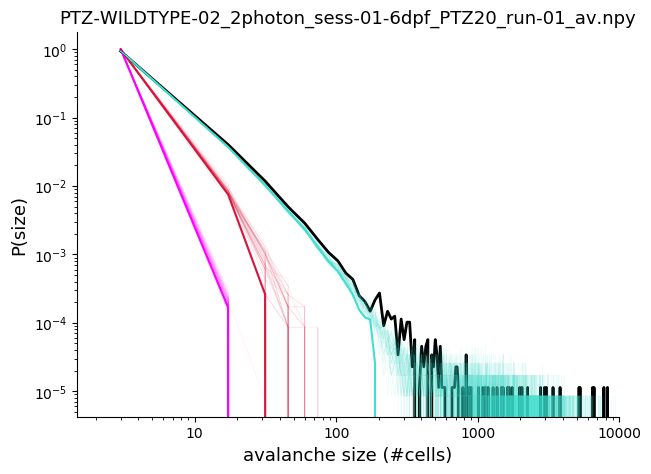

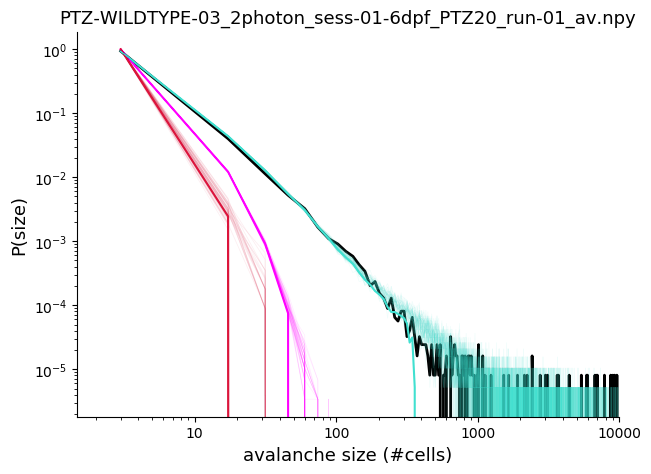

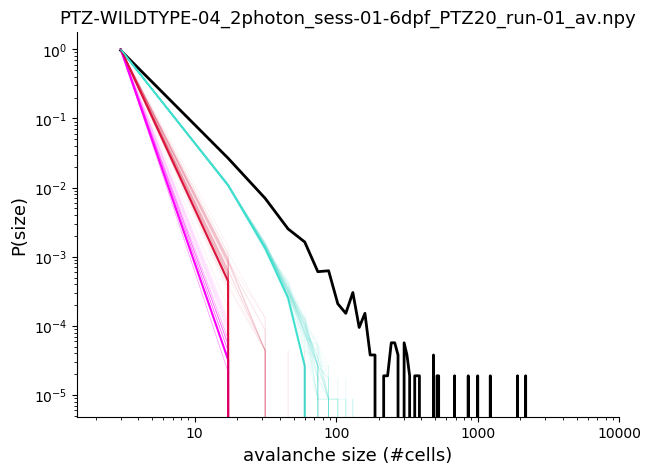

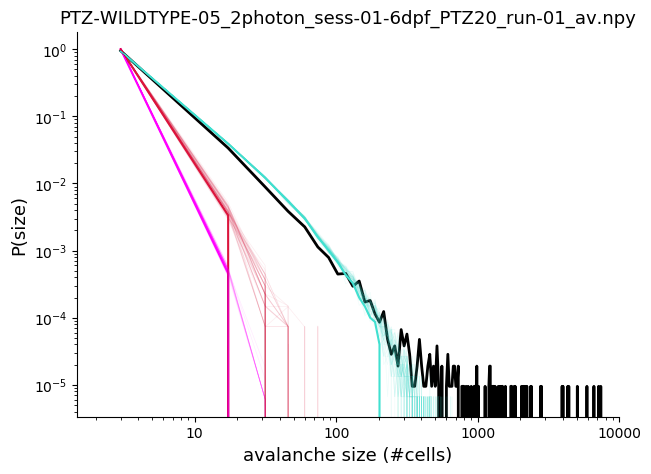

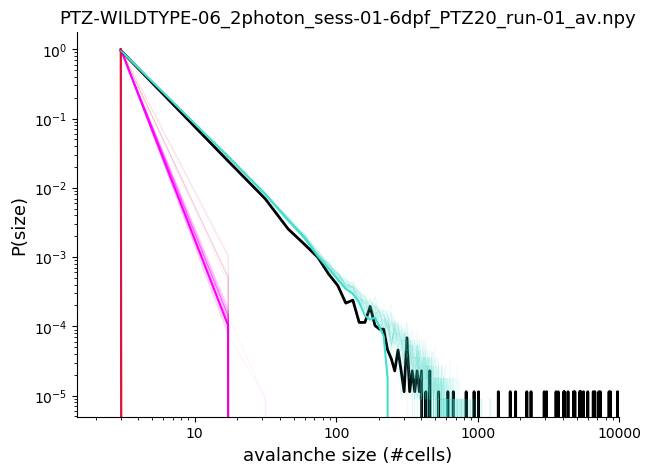

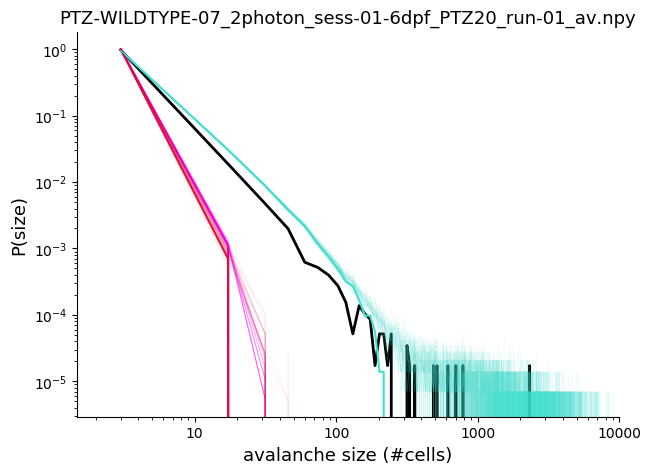

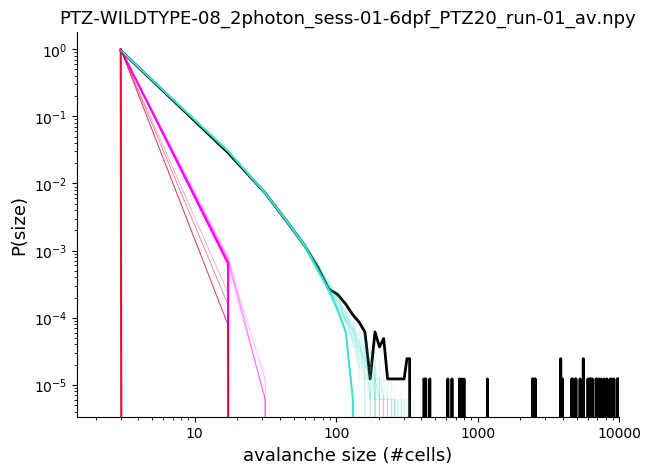

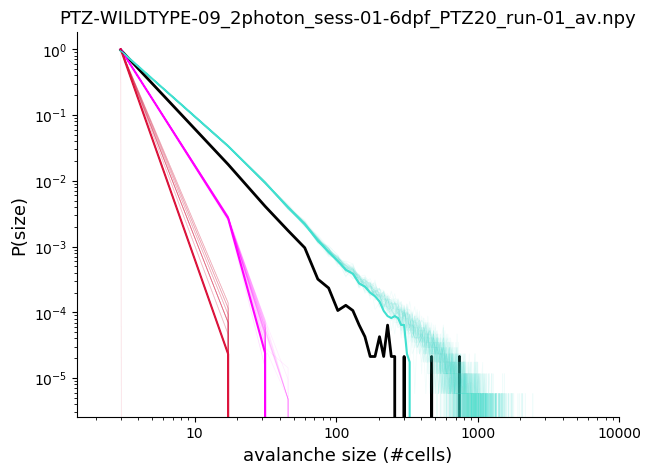

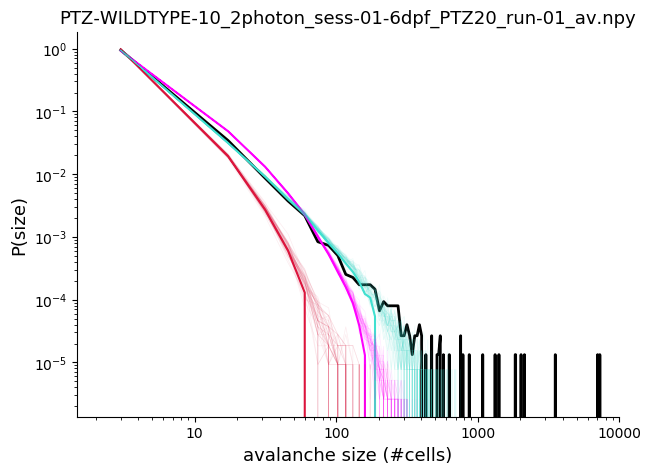

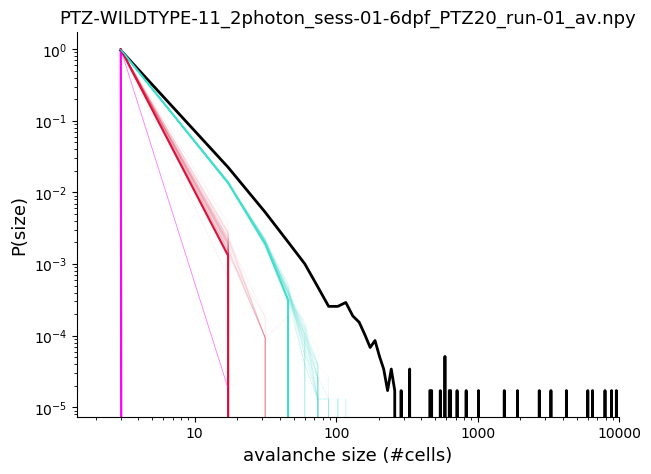

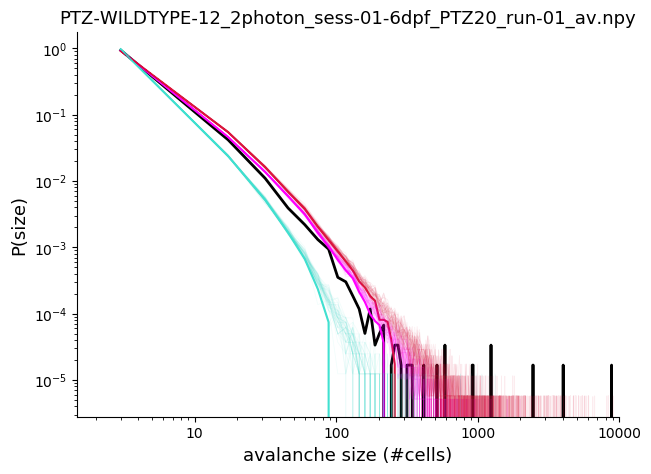

In [41]:
sns.reset_orig()
import matplotlib
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'magenta','crimson','turquoise']
nbins = 340000
choose=0
binvec = np.load(Fdrop + 'Project/' + experiment + os.sep + 'size_ptz20_null_combvec.npy')
maxi, mini = np.max(binvec), np.min(binvec)
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    swaplist = sorted(glob.glob('*E-' + i + '*PTZ20*swap*'))
    shufflelist = sorted(glob.glob('*E-' + i + '*PTZ20*shuff*'))
    slidelist = sorted(glob.glob('*E-' + i + '*PTZ20*slide*'))
    autolist = sorted(glob.glob('*E-' + i + '*PTZ20*auto*'))
    fig, axarr = plt.subplots(figsize = (7,5))
    shuffvec, swapvec, slidevec, autovec =[],[],[],[]
    veclist = [shuffvec, swapvec, autovec]
    nulist = [shufflelist, swaplist, autolist]
    avdistcut = np.load(blnlist[0])[choose]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, c = colors[0])
    for e in range(len(nulist)):
        mean_null = adfn.mean_distribution(nulist[e], choose)
        binned = np.linspace(mini,maxi,nbins)
        hist = np.histogram(mean_null, bins = binned)
        xaxis = hist[1][:-1]
        yaxis = hist[0]/np.sum(hist[0])
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[e+1])
    for e in range(len(veclist)):
        for t in range(len(nulist[e])):
            binned = np.linspace(mini,maxi,nbins)
            hist = np.histogram(np.load(nulist[e][t])[0], bins = binned)
            xaxis = hist[1][:-1]
            yaxis = hist[0]/np.sum(hist[0])
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 0.5, markersize = 1, alpha = 0.08, c = colors[e+1])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 10000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(size)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

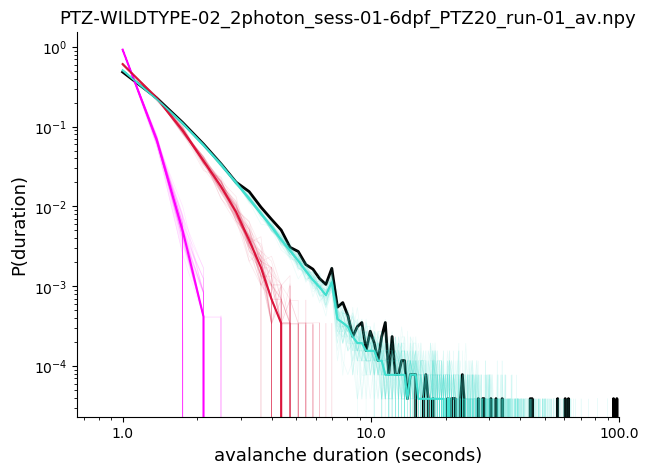

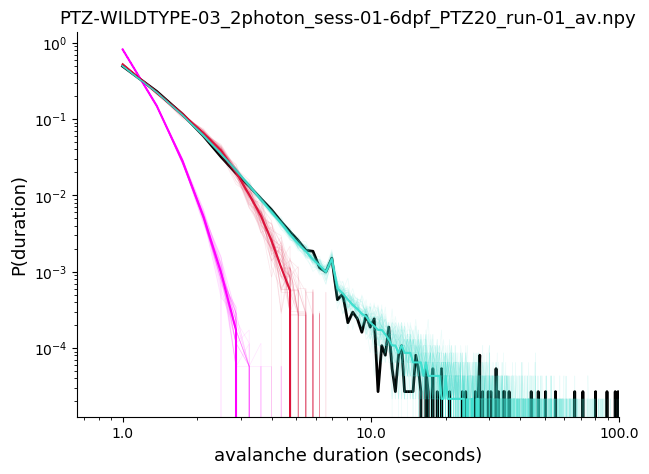

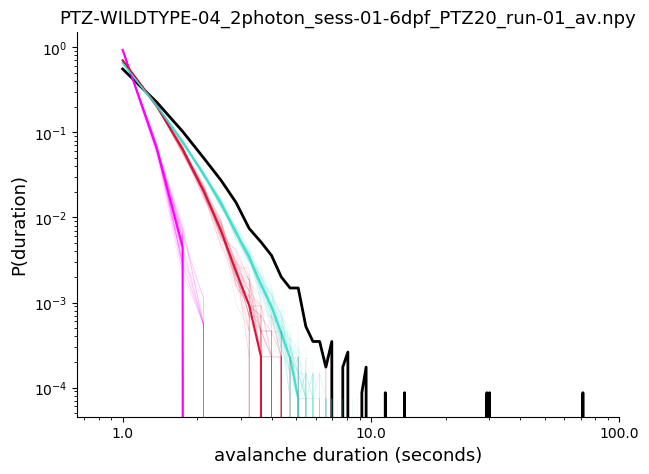

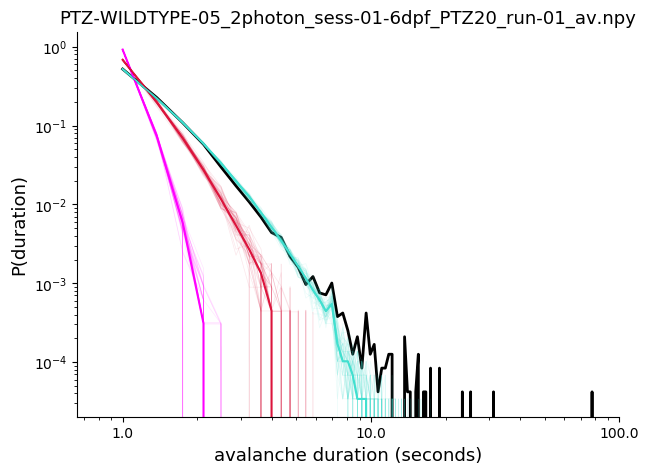

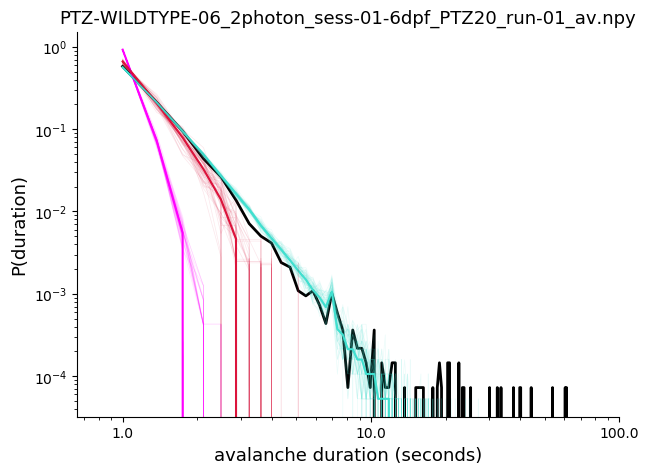

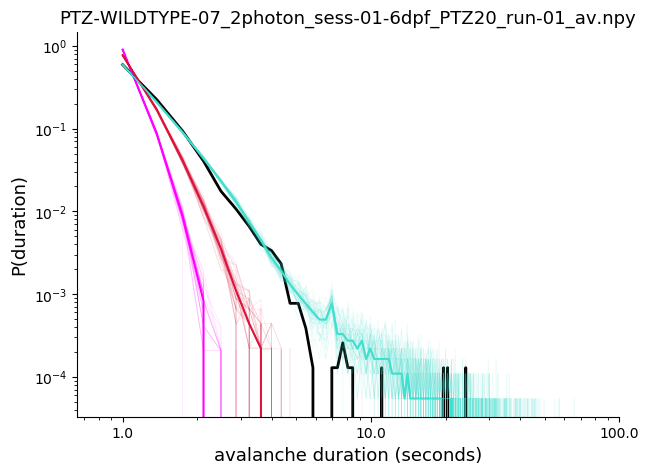

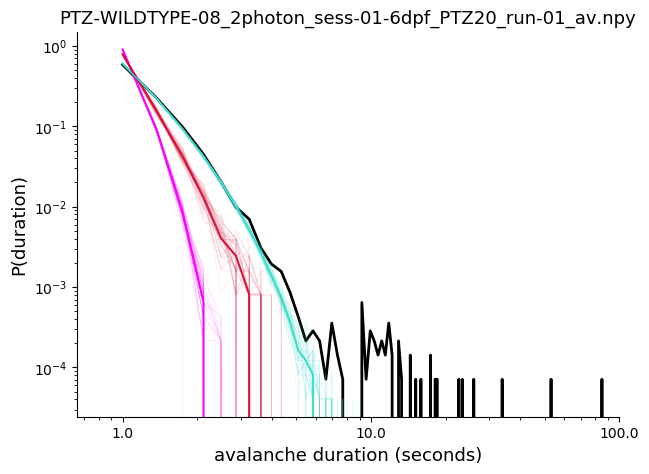

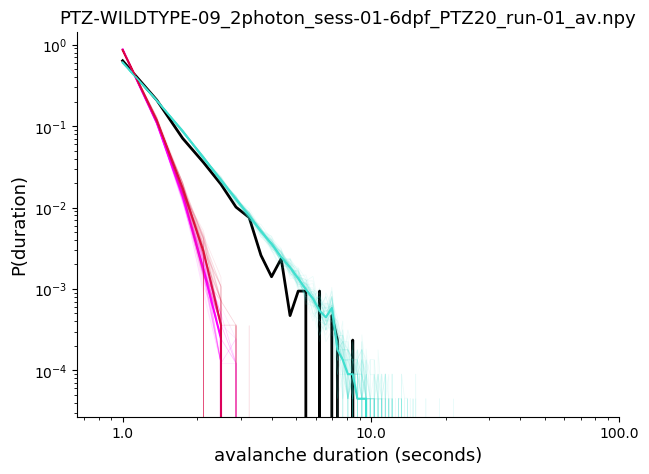

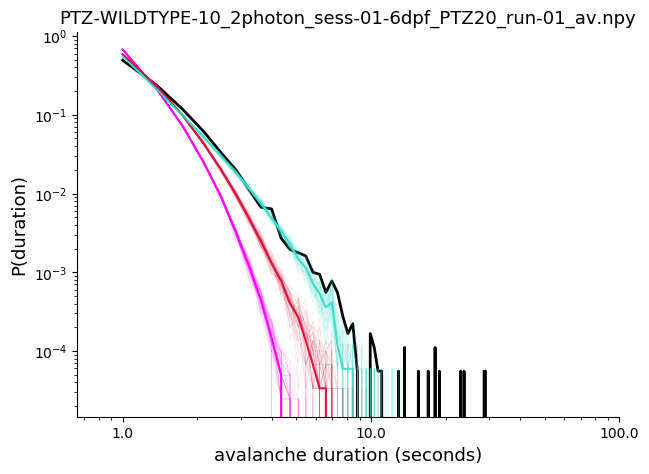

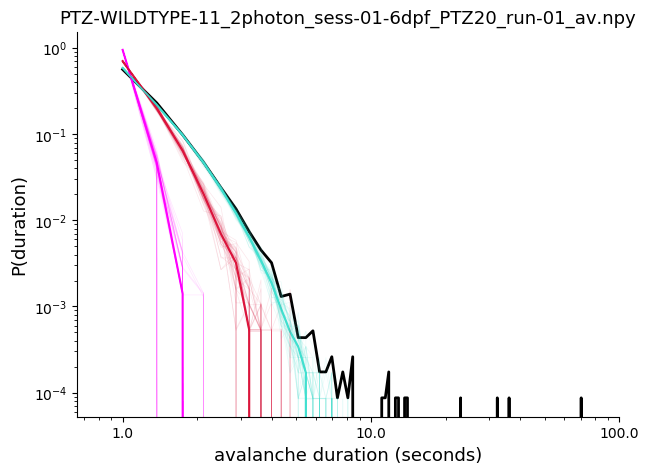

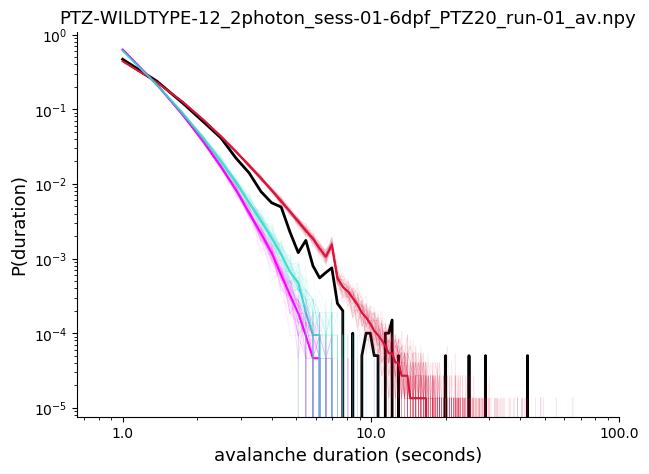

In [42]:
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'magenta','crimson','turquoise']
nbins = 13200
choose=1
dur_binvec = np.load(Fdrop + 'Project/' + experiment + os.sep + 'dur_ptz20_null_combvec.npy')
maxi, mini = np.max(dur_binvec), np.min(dur_binvec)
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    swaplist = sorted(glob.glob('*E-' + i + '*PTZ20*swap*'))
    shufflelist = sorted(glob.glob('*E-' + i + '*PTZ20*shuff*'))
    slidelist = sorted(glob.glob('*E-' + i + '*PTZ20*slide*'))
    autolist = sorted(glob.glob('*E-' + i + '*PTZ20*auto*'))
    fig, axarr = plt.subplots(figsize = (7,5))
    frameon=False
    shuffvec, swapvec, slidevec, autovec =[],[],[],[]
    veclist = [shuffvec, swapvec, autovec]
    nulist = [shufflelist, swaplist, autolist]
    avdistcut = (1/2.73)*np.load(blnlist[0])[1]
    binned=np.linspace(mini,maxi, nbins)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 2, markersize = 1, alpha = 1, c = colors[0])
    for e in range(len(nulist)):
        mean_null = adfn.mean_distribution(nulist[e], choose)
        binned = np.linspace(mini,maxi,nbins)
        hist = np.histogram((1/2.73)*mean_null, bins = binned)
        xaxis = hist[1][:-1]
        yaxis = hist[0]/np.sum(hist[0])
        axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1, c = colors[e+1])
    for e in range(len(nulist)):
        for t in range(len(nulist[e])):
            binned = np.linspace(mini,maxi,nbins)
            hist = np.histogram((1/2.73)*np.load(nulist[e][t])[1], bins = binned)
            xaxis = hist[1][:-1]
            yaxis = hist[0]/np.sum(hist[0])
            axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 0.5, markersize = 1, alpha = 0.1, c = colors[e+1])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 100)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

### ks distance
* Which null distributions are more important to generate critical avalanche dynamics
* Size - spatial structure important - temporal structure no longer important
* Duration - spatial structure and temporal structure equally important 

* {for each fish - generate an average distribution, find ks distance of each point to that distribution}
* {for each baseline, quantify how far the baseline deviaties from that value - plot that ks distance (significant if > 1.96 sd from null mean)}


In [7]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
size_powlist = sorted(glob.glob('*PTZ20*size*_power*'))
size_loglist = sorted(glob.glob('*PTZ20*size*_log*'))
dur_powlist = sorted(glob.glob('*PTZ20*dur*_power*'))
dur_loglist = sorted(glob.glob('*PTZ20*dur*_log*'))
dur_powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_dur_marglik_power.npy']

In [188]:
#SIZE - PTZ20 MARGINAL LIKELIHOODS
count=0
choose = 0
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ20*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_size_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_size_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01


In [189]:
#DUR - BASELINE MARGINAL LIKELIHOODS
count=0
choose = 1
prac_blnexp = np.zeros(11)
for i in num1:
    avlist =  sorted(glob.glob('*E-' + str(i) + '*PTZ20*_av.npy'))
    data = np.load(avlist[0])
    sizes=data[choose]
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    npart = 2000 #number of particles - number of draws from prior distribution
    ln=IS_LN(npart)
    po=IS(npart)
    prac_blnexp[count] = po[0]
    count+=1
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short') + '_dur_marglik_power.npy', po)
    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([avlist[0]], 'short')  + '_dur_marglik_log.npy', ln)
    print('Done fish ' + adfn.name_template([avlist[0]], 'short'))

Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01


In [8]:
#EXP - average exponent for each null
from scipy import stats
ks_list = adfn.list_of_list(22,4)
nullexp_list = adfn.list_of_list(22,4)
mode = [0,1]
count=0
num1 = adfn.name_zero('front', 2, 12, 1)
for y in range(2):
    for i in num1:
        os.chdir(Fdrop + 'Project/' + experiment)
        bln = np.load(sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))[0])
        swaplist = sorted(glob.glob('*E-' + i + '*PTZ20*swap*'))
        shufflelist = sorted(glob.glob('*E-' + i + '*PTZ20*shuff*'))
        autolist = sorted(glob.glob('*E-' + i + '*PTZ20*auto*'))
        slidelist = sorted(glob.glob('*E-' + i + '*PTZ20*slide*'))
        null_list = [shufflelist, swaplist,autolist]
        for f in range(len(null_list)):
            mean_null = adfn.mean_distribution(null_list[f], mode[y])
            ks_list[count][f] = crfn.ks_compare(null_list[f], mean_null, bln, mode[y], len(null_list[f]))
            if mode[y] == 0:
                data = mean_null
                sizes=data
                M=len(sizes)
                a=min(sizes) #define xmin
                b=max(sizes) #define xmax
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=isfn.IS_LN(npart, sizes, M, a, b)
                po=isfn.IS(npart, sizes,M, a, b)
                nullexp_list[count][f] = po[0]
            if mode[y] == 1:
                data = mean_null
                sizes=data
                a=2 #define xmin
                b=max(sizes) #define xmax
                M=len(sizes[np.where(sizes>a-1)])
                npart = 2000 #number of particles - number of draws from prior distribution
                ln=isfn.IS_LN(npart, sizes,M, a, b)
                po=isfn.IS(npart, sizes, M, a, b)
                nullexp_list[count][f] = po[0]
        count+=1
        print('Done fish ' + str(i))

Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12
Done fish 02
Done fish 03
Done fish 04
Done fish 05
Done fish 06
Done fish 07
Done fish 08
Done fish 09
Done fish 10
Done fish 11
Done fish 12


In [13]:
#KS distance
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
    
#Null append
sizeks, durks, lab = [],[],[]
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle']
for e in range(len(nulist)):
    for f in range(11):
        sizeks = np.append(sizeks, ks_list[f][e][0])
        durks =  np.append(durks, ks_list[f+11][e][0])
        lab = np.append(lab, nulist[e])

sksdf = pd.DataFrame({ "KS distance": sizeks, "Labels": lab, 'Fish': flist})
dksdf = pd.DataFrame({ "KS distance": durks, "Labels": lab, 'Fish': flist})

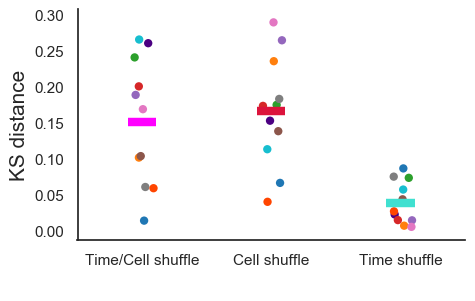

In [14]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise']
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.pointplot(x="Labels", y="KS distance", data=sksdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.stripplot(x="Labels", y="KS distance", data=sksdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [25]:
adfn.ttest(sksdf, 'Labels', 'KS distance', ['Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='multiple')

[[[nan,
   nan,
   0.016666666666666666,
   'Not significant',
   'Time + Cell shuffle - Time + Cell shuffle'],
  [-0.5191699731604296,
   0.6149372742136185,
   0.016666666666666666,
   'Not significant',
   'Time + Cell shuffle - Cell shuffle'],
  [3.737574916476779,
   0.003861918046716324,
   0.016666666666666666,
   'Significant',
   'Time + Cell shuffle - Time shuffle']],
 [[0.5191699731604296,
   0.6149372742136185,
   0.016666666666666666,
   'Not significant',
   'Cell shuffle - Time + Cell shuffle'],
  [nan,
   nan,
   0.016666666666666666,
   'Not significant',
   'Cell shuffle - Cell shuffle'],
  [4.395606126099818,
   0.001344249979338943,
   0.016666666666666666,
   'Significant',
   'Cell shuffle - Time shuffle']],
 [[-3.737574916476779,
   0.003861918046716324,
   0.016666666666666666,
   'Significant',
   'Time shuffle - Time + Cell shuffle'],
  [-4.395606126099818,
   0.001344249979338943,
   0.016666666666666666,
   'Significant',
   'Time shuffle - Cell shuffle'],
 

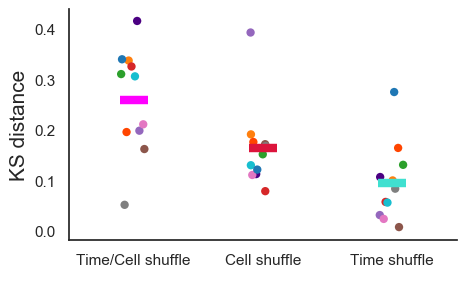

In [18]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise']
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.pointplot(x="Labels", y="KS distance", data=dksdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)

ax = sns.stripplot(x="Labels", y="KS distance", data=dksdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('KS distance', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Time permute'], size = 11)
ax.legend_.remove()
plt.show()

In [26]:
adfn.ttest(dksdf, 'Labels', 'KS distance', ['Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='multiple')

[[[nan,
   nan,
   0.016666666666666666,
   'Not significant',
   'Time + Cell shuffle - Time + Cell shuffle'],
  [2.0424944602757833,
   0.06836152840570595,
   0.016666666666666666,
   'Not significant',
   'Time + Cell shuffle - Cell shuffle'],
  [5.193828900757541,
   0.0004048927097415638,
   0.016666666666666666,
   'Significant',
   'Time + Cell shuffle - Time shuffle']],
 [[-2.0424944602757833,
   0.06836152840570595,
   0.016666666666666666,
   'Not significant',
   'Cell shuffle - Time + Cell shuffle'],
  [nan,
   nan,
   0.016666666666666666,
   'Not significant',
   'Cell shuffle - Cell shuffle'],
  [1.8483559273385761,
   0.09429890949673995,
   0.016666666666666666,
   'Not significant',
   'Cell shuffle - Time shuffle']],
 [[-5.193828900757541,
   0.0004048927097415638,
   0.016666666666666666,
   'Significant',
   'Time shuffle - Time + Cell shuffle'],
  [-1.8483559273385761,
   0.09429890949673995,
   0.016666666666666666,
   'Not significant',
   'Time shuffle - Cell 

### EXPONENT

* which null distributions increase/decrease avalanche number?
* Cell location reduces avalanche size/duration, time structure and autocorrelation unimportant in seizure avalanches

In [20]:
#EXPONENT CALCULATION - Baseline append
blnexp, blnlab = [],[]
blnlist = [size_powlist, dur_powlist]
for i in range(len(blnlist)):
    for e in range(len(blnlist[i])):
        blnexp = np.append(blnexp, np.load(blnlist[i][e], allow_pickle=True)[0])
blnlab = adfn.repeat_list('Baseline', 22)

#Make fish name list
fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(4):
    flist = np.append(flist, fli)
    
#Null append
sizex, durx, lab = [],[],[]
nulist = ['Time + Cell shuffle', 'Cell shuffle','Time shuffle']
for e in range(len(nulist)):
    for f in range(11):
        sizex = np.append(sizex, nullexp_list[f][e])
        durx =  np.append(durx, nullexp_list[f+11][e])
        lab = np.append(lab, nulist[e])

#Append together 
labcomb = np.append(lab,blnlab[:11])            
sizecomb = np.append(sizex,blnexp[:11])
durcomb = np.append(durx,blnexp[11:])

sxdf = pd.DataFrame({ "Exponent": sizecomb, "Labels": labcomb, 'Fish': flist})
dxdf = pd.DataFrame({ "Exponent": durcomb, "Labels": labcomb, 'Fish': flist})

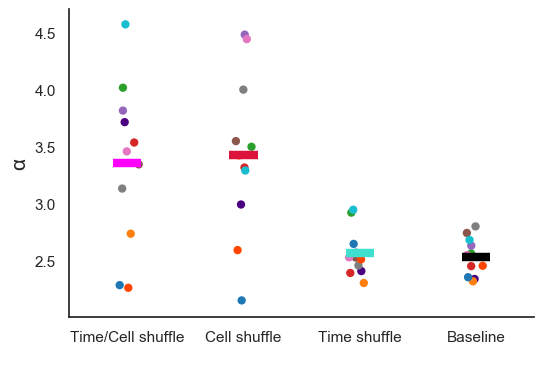

In [21]:
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise', 'black']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data=sxdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="Exponent", data=sxdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Baseline'], size = 11)
ax.legend_.remove()
plt.show()

In [27]:
adfn.ttest(sxdf, 'Labels', 'Exponent', ['Baseline','Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='single')

[[-4.116206933575588,
  0.002089717287186587,
  0.016666666666666666,
  'Significant',
  'Baseline - Time + Cell shuffle'],
 [-4.706993237078907,
  0.0008326884273481725,
  0.016666666666666666,
  'Significant',
  'Baseline - Cell shuffle'],
 [-0.4602823457341297,
  0.6551596067481453,
  0.016666666666666666,
  'Not significant',
  'Baseline - Time shuffle']]

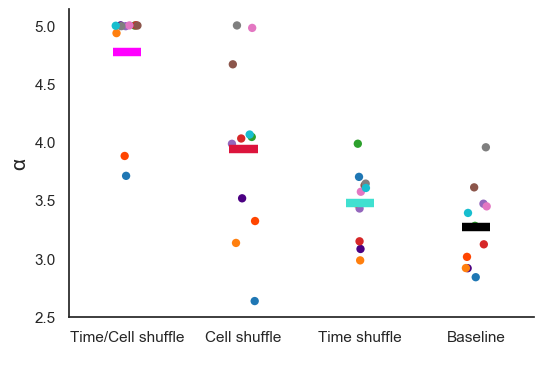

In [23]:
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['magenta','crimson','turquoise', 'black']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Exponent", data=dxdf, hue = 'Labels', palette = colors2, join=False, ci=0, scale=3, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="Labels", y="Exponent", data=dxdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '15')
ax.set_xticklabels(['Time/Cell shuffle', 'Cell shuffle', 'Time shuffle', 'Baseline'], size = 11)
ax.legend_.remove()
plt.show()

In [28]:
adfn.ttest(dxdf, 'Labels', 'Exponent', ['Baseline','Time + Cell shuffle', 'Cell shuffle','Time shuffle'], mode='single')

[[-11.638305572897266,
  3.893663010657905e-07,
  0.016666666666666666,
  'Significant',
  'Baseline - Time + Cell shuffle'],
 [-4.73073212328938,
  0.000803287084514129,
  0.016666666666666666,
  'Significant',
  'Baseline - Cell shuffle'],
 [-2.01760933722841,
  0.07126412075267682,
  0.016666666666666666,
  'Not significant',
  'Baseline - Time shuffle']]